# Regression
Noah Armsworthy<br>
August 15, 2022

#Linear Regression
$y = w_0*x_0 + w_1*x_1 + ... + w_m * x_m + b$ <br>
Where $m$ is the number of parameters in our data, $b$ is our bias and $y$ is our target value.<br>

###Understanding process using brute force looping

Before going into the calculus of a Linear Regression model, I first want to go over the basis of parameter tuning or "training". 

In [ ]:
#Needed Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn')

In [ ]:
#Seting the random seed for consistency
np.random.seed(46)

####Generating Synthetic Data
Though there are many free sources of datasets to play with, when it comes to the basics it's sometimes best to generate your own data so you can fully understand and manipulate it. 

For this simplification, we will be using one $x$ value, its weight and a bias to predict a $y$ value.

In [ ]:
'''Choose values between [-2, 2] for wTRUE and bTRUE using numpy.random.uniform'''
def chooseParams():
    w = np.random.uniform(low=-2.0, high=2.0)
    b = np.random.uniform(low=-2.0, high=2.0)
    return w, b

'''Generates n amount of x points between the values of xLow, xHi and calculates their corresponding label values, given w and b.
noiseType either uniform (sigma has no impact) or gaussian(zero mean).
Returns two numpy arrays X and Y.
ytrue = wtrue x + btrue + noise 
'''
def generateNoisyLinearData(n, xLo, xHi, w, b, noiseType, sigma):
    X = np.random.uniform(low=xLo, high=xHi, size=n)
    Y = np.zeros(n)
    #Uniform noise. Meaning each potential value within a range has the same likelyhood
    if noiseType == 'uniform':
      #Each value of Y must have its own generated noise
      noise = np.random.uniform(low=xLo, high=xHi, size=Y.shape)
      #Numpy arrays allow for math using arrays (Y and X)
      Y = w * X + b + np.random.uniform(low=xLo, high=xHi)
        
    elif noiseType == 'gaussian': #AKA Normal distribution. Using a 0 mean.
      #Each value of Y must have its own generated noise
      noise = np.random.normal(0, scale=sigma, size=Y.shape)
      #Numpy arrays allow for math using arrays (Y and X)
      Y = (w * X) + b + noise
  
    return X, Y

'''Plot the points generated with the function above. 
Make sure that the axes are labelled sufficiently that the viewer can see that the points are indeed in the correct ranges.
'''
def plotLinearData(X, Y):
    plt.scatter(X, Y)
    plt.style.use('seaborn-muted')
    plt.title("Generated Linear Data")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.show()

Generated w: 1.1353294032230026, b: 0.5393348242109206



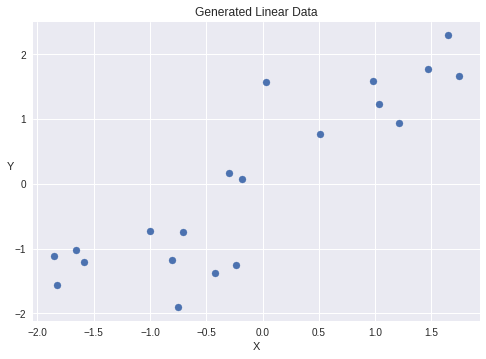

In [ ]:
#n is number of data points to generate
#n = int(input("Enter value for n: ")) #Uncomment for user input enabled n selection
n = 20
#wTrue and bTrue
w, b = chooseParams()
print("Generated w: {}, b: {}\n".format(w,b))

#These values are then used to generate our linear data
X, Y = generateNoisyLinearData(n, -2, 2, w, b, "gaussian", 1)
plotLinearData(X, Y)

Though we know the true values for w and b here, in the real world we would not so our Linear Regression's goal is to find these parameters through optimization. Synthetic data allows us to compare these values to our final results.

####Loss/Cost Functions
Now we must define what we would consider to be a loss, or how bad of a fit we have to our data. For our case, we are trying to fit a line to the data so our loss can be defined as a function of distance from each point to that line.

First, we predict our line using our linear equation $ypred$ and get the difference between it an our true y value $ytrue$.

We want to keep our loss small and positive for easy comprehension. There are two methods we can use, absolute value or squared value.

Finally, we want to sum the loss over all data points in the data set to be able to return an average loss. This average is referred to as a total <b>Cost</b> for the rest of the page. The end goal is to reduce this cost to the lowest it can go.

In [ ]:
'''The loss function calculates loss of a single point based on distance between ypredicted value and y true value. 
If absolute, it returns the absolute value of the distance.
If square, then it returns the squared distance.'''
def loss(w, b, x, ytrue, lossType):
    #predict y
    ypred = (w * x) + b
    loss = 0

    #print('w',w,'b',b,'x',x,'ytrue',ytrue)
    if lossType == 'absolute':
        loss = abs(ypred - ytrue)
    elif lossType == 'square':
        loss = (ypred - ytrue) ** 2
        
    #print("ytrue: {} ypred: {} loss: {}".format(ytrue, ypred, loss))
    return loss

'''The cost function will sum the total loss of each point in a data set D then computes and returns the average loss.'''
def cost(w, b, X, Y, lossType):
    totalLoss = 0
    for i in range(0, len(X)):
        totalLoss += loss(w, b, X[i], Y[i], lossType)
        
    #print("Total loss: {}".format(totalLoss))
    #Returning the average loss
    return totalLoss/len(X)

####Finding a $w$
The general idea of finding a prediction for $w$ is to try through potential values and see how it affects the overal cost of the prediction.

Below we'll try looping $w$ between [-2.0 , 2.0] and see how it affects our cost. (We'll leave b = 0 for now)

In [ ]:
'''varyW will take in a set value for lossType, b, a numpy array(X) of x values, and a numpy array of their corresponding labels(Y).
It give the data to cost function and test on varied values for w, storing the cost in an equally sized array.
Then it plots the cost and w value.
0.1: Added a binary value to choose whether to plot results '''
def varyW(b, X, Y, lossType, plot):
    #Zip up data to be handed into the cost function
    Data = np.stack((X,Y), axis = 1)
    #List of varying w values from -2 to 2
    #Arange (start, stop(not included), step, dtype)
    wRange = np.arange(-2.0, 2.01, 0.01)
    npCosts = np.zeros(len(wRange))
    
    #vary w, given b and Data
    for i in range(0, len(wRange)):
        npCosts[i] = cost(wRange[i], b, X, Y, lossType)
        #0.1: Print the b value used
        if(i % 25 == 0):
          print("Average Loss for b={} and w={}: {}".format(b, wRange[i], npCosts[i]))
    if plot == 1:
      plt.plot(wRange, npCosts)
      plt.title("Generated Linear Data")
      plt.xlabel("Estimated Value of w")
      plt.ylabel("Cost (Avg Loss)")
      plt.show()

    #print(npCosts)
    #0.1: Now will return the cost values for the varied W
    return npCosts

Average Loss for b=0 and w=-2.0: 12.43625523946098
Average Loss for b=0 and w=-1.7499999999999998: 10.513264253723268
Average Loss for b=0 and w=-1.4999999999999996: 8.757802784951732
Average Loss for b=0 and w=-1.2499999999999993: 7.169870833146372
Average Loss for b=0 and w=-0.9999999999999991: 5.749468398307184
Average Loss for b=0 and w=-0.7499999999999989: 4.496595480434172
Average Loss for b=0 and w=-0.49999999999999867: 3.4112520795273324
Average Loss for b=0 and w=-0.24999999999999845: 2.493438195586668
Average Loss for b=0 and w=1.7763568394002505e-15: 1.7431538286121775
Average Loss for b=0 and w=0.2500000000000018: 1.1603989786038629
Average Loss for b=0 and w=0.5000000000000022: 0.7451736455617215
Average Loss for b=0 and w=0.7500000000000027: 0.49747782948575436
Average Loss for b=0 and w=1.0000000000000027: 0.41731153037596214
Average Loss for b=0 and w=1.2500000000000027: 0.5046747482323439
Average Loss for b=0 and w=1.500000000000003: 0.7595674830549006
Average Loss for

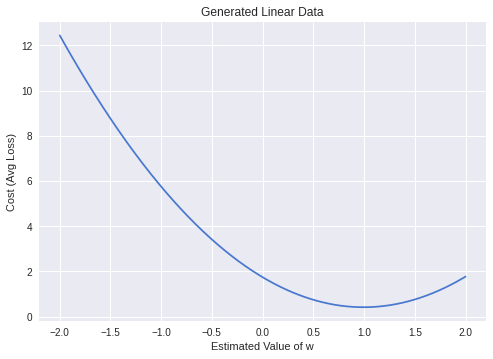

In [ ]:
#Look for w by assuming 0 bias
costs = varyW(0, X, Y, 'square', 1)
#Reprint the true values for comparison
#print("\nwtrue: {}, btrue: {}".format(w,b))

You can see from the graph above there is obviously a point where a value of $w$ generates the lowest cost for our prediction.

Because we returned all cost values, we can use the lowest cost to find its corresponding $w$ below.

In [ ]:
wRange = np.arange(-2.0, 2.01, 0.01)
#The minimum cost value will give us the best estimate for w
minC = np.min(costs)
#We can use the index of the minimum cost to find the actual value for w at that point
estW = wRange[np.where(costs == np.min(costs))[0][0]] #np.where will return a tuple, so we must extract the integer index value
print("Lowest average loss: {} Estimated best w value: {} ".format(minC,estW))
print("\nwtrue: {}".format(w))

Lowest average loss: 0.4173016156146033 Estimated best w value: 0.9900000000000029 

wtrue: 1.1353294032230026


Here we're assuming a 0 bias, so examples that have a bias similar to that can give us a very close result but having to loop through a range of values and try to guess how small of steps to take is highly inefficient. 

####Finding a $b$ & The Loss Surface
We can use a similar method to find $b$, which will involve looping through potential values of $b$ <b>and</b> the potential values of $w$ together. 

In [ ]:
bRange = np.arange(-2.0, 2.01, 0.01)
VariedCosts = np.zeros(shape=(len(bRange), len(bRange)))
for i in range(0, len(VariedCosts)):
  VariedCosts[i] = varyW(bRange[i], X, Y, 'square', 0)

Streaming output truncated to the last 5000 lines.
Average Loss for b=-0.9399999999999991 and w=1.7500000000000036: 2.5007972651987034
Average Loss for b=-0.9399999999999991 and w=2.0000000000000036: 3.1538016720868822
Average Loss for b=-0.929999999999999 and w=-2.0: 12.796004921664203
Average Loss for b=-0.929999999999999 and w=-1.7499999999999998: 10.93539580131367
Average Loss for b=-0.929999999999999 and w=-1.4999999999999996: 9.24231619792931
Average Loss for b=-0.929999999999999 and w=-1.2499999999999993: 7.716766111511123
Average Loss for b=-0.929999999999999 and w=-0.9999999999999991: 6.358745542059113
Average Loss for b=-0.929999999999999 and w=-0.7499999999999989: 5.168254489573277
Average Loss for b=-0.929999999999999 and w=-0.49999999999999867: 4.1452929540536125
Average Loss for b=-0.929999999999999 and w=-0.24999999999999845: 3.2898609355001263
Average Loss for b=-0.929999999999999 and w=1.7763568394002505e-15: 2.6019584339128126
Average Loss for b=-0.929999999999999 and

In order to visualize cost with respect to both $w$ and $b$ we'll collect the cost results in a Pandas dataframe.

In [ ]:
import pandas as pd

df = pd.DataFrame(data = VariedCosts, index=wRange, columns=bRange)
df

,-2.00,-1.99,-1.98,-1.97,-1.96,-1.95,-1.94,-1.93,-1.92,-1.91,...,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00
-2.00,15.349910,15.275140,15.200638,15.126405,15.052439,14.978741,14.905311,14.832149,14.759256,14.686630,...,6.552092,6.582128,6.612433,6.643005,6.673846,6.704955,6.736331,6.767976,6.799889,6.832070
-1.99,15.315442,15.240645,15.166117,15.091856,15.017863,14.944138,14.870682,14.797493,14.724573,14.651920,...,6.507133,6.537142,6.567420,6.597966,6.628779,6.659861,6.691211,6.722829,6.754715,6.786869
-1.98,15.281174,15.206350,15.131795,15.057507,14.983487,14.909736,14.836253,14.763037,14.690090,14.617410,...,6.462374,6.492356,6.522607,6.553126,6.583913,6.614968,6.646291,6.677882,6.709741,6.741868
-1.97,15.247106,15.172255,15.097673,15.023358,14.949312,14.875534,14.802023,14.728781,14.655807,14.583101,...,6.417814,6.447770,6.477994,6.508486,6.539246,6.570275,6.601571,6.633135,6.664967,6.697068
-1.96,15.213237,15.138360,15.063751,14.989409,14.915336,14.841531,14.767994,14.694725,14.621724,14.548991,...,6.373455,6.403384,6.433581,6.464047,6.494780,6.525781,6.557051,6.588588,6.620393,6.652467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.96,17.342473,17.257078,17.171951,17.087092,17.002501,16.918178,16.834123,16.750337,16.666818,16.583567,...,4.390264,4.409675,4.429355,4.449302,4.469518,4.490001,4.510753,4.531773,4.553060,4.574616
1.97,17.387205,17.301783,17.216629,17.131743,17.047126,16.962776,16.878694,16.794881,16.711335,16.628057,...,4.424505,4.443889,4.463542,4.483462,4.503651,4.524108,4.544833,4.565826,4.587086,4.608615
1.98,17.432137,17.346688,17.261507,17.176595,17.091950,17.007573,16.923465,16.839624,16.756052,16.672748,...,4.458945,4.478303,4.497929,4.517823,4.537985,4.558415,4.579113,4.600079,4.621313,4.642815
1.99,17.477268,17.391793,17.306585,17.221646,17.136974,17.052571,16.968436,16.884568,16.800969,16.717638,...,4.493586,4.512917,4.532516,4.552383,4.572518,4.592921,4.613592,4.634532,4.655739,4.677214


Now our cost graph is a 3D surface, which is a bit harder to interpret. 

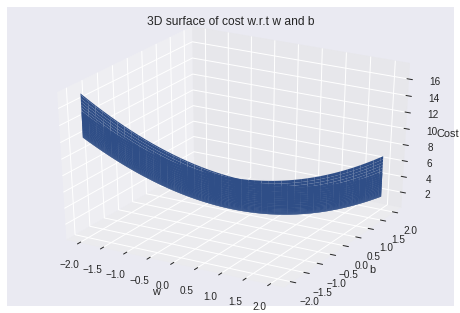

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(wRange, bRange, VariedCosts)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('3D surface of cost w.r.t w and b')
plt.show()

A better look at this graph can be done with a contour map.
Additionally, we can use the minimum cost value to find the indices of $w$ and $b$ that give us that lowest cost.

In [ ]:
#Retrieving the minimum calculated cost value and its indices
minCost = np.min(VariedCosts)
minIndex = np.where(VariedCosts == np.min(VariedCosts))
print('The minimum cost found was:',minCost)
#Index would be (b, w) because of form of 2-d array
print('The indices where the minimum cost is stored', minIndex)

#Grabbing the relevant indices
minB = minIndex[0][0]
minW = minIndex[1][0]
#print(VariedCosts[minB, minW]) #To confirm location

The minimum cost found was: 0.4001125521597061
The indices where the minimum cost is stored (array([213]), array([301]))


Using these indices, we can reveal the global minima with respect to $w$ and $b$.

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


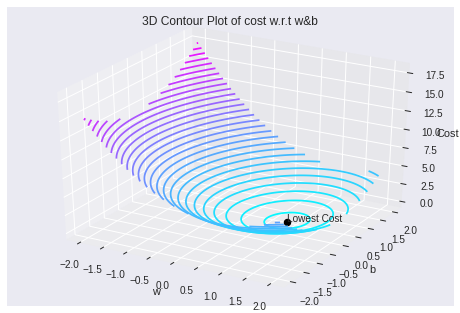

In [ ]:
levels = 30

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#w and b both vary by the same values so we use the varyB list for both x and y because it is in the outer scope
ax.contour3D(wRange, bRange, VariedCosts, levels, cmap='cool')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('3D Contour Plot of cost w.r.t w&b')
#Marking the spot of the minimum cost
ax.scatter(wRange[minW],bRange[minB], VariedCosts[minB, minW] ,color='black', linewidths=3, zorder=levels+1) 
ax.text(wRange[minW],bRange[minB], VariedCosts[minB, minW], s="Lowest Cost", zorder=levels+2)
plt.show()

Above you can see the point marked in the 3D plot is the bottom of a pit which is our loss surface. 

###Gradient Descent

We can use our understanding of the loss surface to find a better way to reach the bottom of this pit. 

I'm not going to go too heavily into the math, but the idea of optimizing this descent comes from derivatives and their ability to tell us the direction of steepest increase within a graph.

We have two parameters that we are looking to optimize, so we first need to find their partial derivatives with respect to the function of interest, the <b>Cost Function</b>. <br>
$Cost = \frac{(ypred - ytrue)^2}{n}$ <br>
$\frac{\partial{C}}{\partial{w}}   = (2/n) * (y_{pred} - y)*x$ <br>
$\frac{\partial{C}}{\partial{b}} = (2/n) * (y_{pred} - y)$



Please see https://medium.com/analytics-vidhya/linear-regression-with-gradient-descent-derivation-c10685ddf0f4 for a great break down of the calculus involved in getting these partial derivatives.

For $\partial{w}$, we can use the dot product to multiply and sum the vector X and the vector (yPred - y). <Br>
See an image example of dot product below referenced from: http://media5.datahacker.rs/2020/04/Picture27-1024x386.jpg

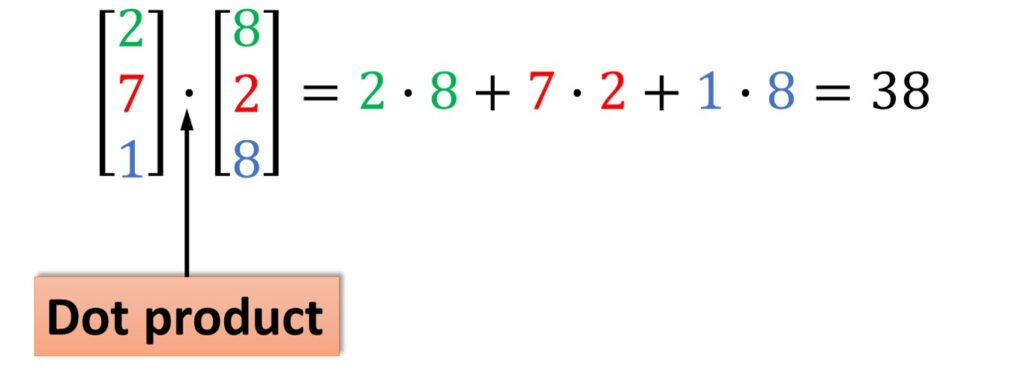

In [ ]:
'''Below are the functions to compute the derivatives of w & b at their current positions'''

def compute_dcdw(X, Y, w, b): #Data, ytrue, variables for ypred
  '''Use the current w & b values to predict y
  would also work as yPred = w * X + b because of numpy, but leaving it as dot product for clarity'''
  yPred = np.dot(w,X) + b
  # n = length of X, aka how many data points. Division by n adjusts the scale of the dot product
  return 2/len(X) * np.dot(X, (yPred - Y))

def compute_dcdb(X, Y, w, b):
  yPred = np.dot(w,X) + b
  #For b, we are summing all the differences between predicted y and y true, then scaling it using n
  return 2/len(X) * np.sum(yPred - Y)

'''The derivative tells us the value of greatest ASCENT, to travel up the steepest path.
What we want for our model is the steepest DESCENT to get the lowest costs so we will subtract these found derivatives from our
training variables.
You can see below that the negative partial derivative returned when starting at 0 will push the values
of w and b in the DIRECTION (sign) of their true value. 
Both examples would overstep their true value because the steps are far too large. We will reduce these steps
using learning rate later on.'''
print("Example of -dc/dw starting at 0: {} true w is {}".format(-compute_dcdw(X, Y, 0, 0), w))
print("Example of -dc/db starting at 0: {} true b is {}".format(-compute_dcdb(X, Y, 0, 0), b))


Example of -dc/dw starting at 0: 2.666078433965614 true w is 1.1353294032230026
Example of -dc/db starting at 0: -0.006554187848778881 true b is 0.5393348242109206


### Implementing Gradient Descent

In order to train our model, we want to continuously update our unknown parameters by subtracting it's partial derivative.

The size of the 'step' we take when updating the parameter is controlled by an additional hyperparameter alpha which represents our <b>learning rate</b>.

Finally, the number of epochs is how many times this update will happen, aka how long we train for. These hyperparameters can be tuned for efficiency.

In [ ]:
''' The following function will be our training loop, where we update the parameters using their
partial derivatives times a learning rate alpha. 
Alpha is how strong each "step" will be, so we want it to be relatively small so we do not greatly overstep our
desired minima.
'''

def updateParams(X, Y, w, b, alpha, epochs):
  #Collecting all results in lists for later analysis
  allW = [w]
  allB = [b]
  allC = [cost(w, b, X, Y, 'square')]
  for i in range(epochs + 1):
    w -= (alpha * compute_dcdw(X, Y, w, b))
    b -= (alpha * compute_dcdb(X, Y, w, b))
    allW.append(w)
    allB.append(b)
    allC.append(cost(w, b, X, Y, 'square'))
    if i % 10 == 0: #To reduce printing clutter
      print("After Epoch #{} w: {} b: {}".format(i, w, b))

  return w, b, allW, allB, allC

In [ ]:
#Epochs are how many times we will step
epochs = 300
#Our starting point for w and b are arbitrary
newW, newB, listW, listB, listC = updateParams(X, Y, 0, 0, 0.01, epochs)

After Epoch #0 w: 0.02666078433965614 b: 5.991431610833154e-06
After Epoch #10 w: 0.2569884807751604 b: 0.00338753882461043
After Epoch #20 w: 0.43264922394206906 b: 0.011012748580487728
After Epoch #30 w: 0.566727336937002 b: 0.020952946668273825
After Epoch #40 w: 0.6691556616447788 b: 0.0319077915099955
After Epoch #50 w: 0.7474781745005225 b: 0.04302402496048361
After Epoch #60 w: 0.8074274262944113 b: 0.053763415323710935
After Epoch #70 w: 0.853361882235959 b: 0.06380700154827763
After Epoch #80 w: 0.8885972460026028 b: 0.07298605301386288
After Epoch #90 w: 0.9156575431901621 b: 0.08123262903446771
After Epoch #100 w: 0.9364654594095364 b: 0.08854446558932351
After Epoch #110 w: 0.9524866806401953 b: 0.09496029102297429
After Epoch #120 w: 0.9648393939548268 b: 0.10054269554643215
After Epoch #130 w: 0.9743773925098552 b: 0.10536643988390293
After Epoch #140 w: 0.9817531760384639 b: 0.10951065276511289
After Epoch #150 w: 0.9874658855037851 b: 0.11305378494325442
After Epoch #16

In [ ]:
print("wtrue:{} wopt from gradient descent:{}\nbtrue:{} bopt from gradient descent:{}".format(w, newW, b, newB))

wtrue:1.1353294032230026 wopt from gradient descent:1.0072082857116376
btrue:0.5393348242109206 bopt from gradient descent:0.13070967735874645


At first glance, this might look unsuccessful, but keep in mind that our w & b values were generated first then our data was generated with a random amount of noise to create variation in our datapoints. This means the variables that give us the best fit will not be exactly the same as the first ones generated. 


To prove this to ourselves we can take a look at how our cost was affected during training.

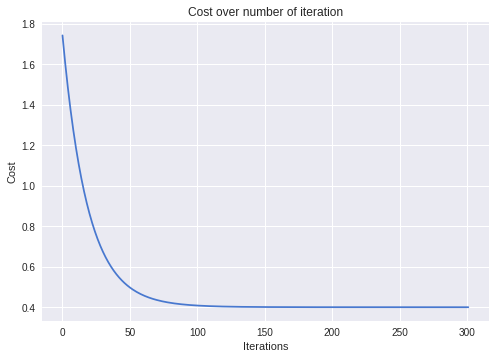

In [ ]:
listEpochs = list(range(0, epochs + 2))

plt.plot(listEpochs,listC)
plt.title("Cost over number of iteration")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Here you can see that we were decreasing the cost very rapidly until we hit a point where it began to level out. From there, no more corrections with our curren state of hyper parameters made any real changes to decrease the cost.

###Contour Graph Overlay

To better visualize the path of gradient descent, we can reuse our contour map from before and map out the journey with a scatterplot overlay.

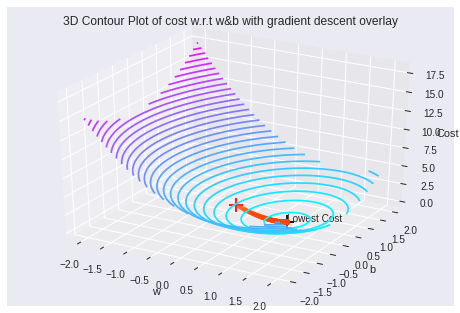

In [ ]:
'''Overlaying our new cost data on the contour plot
'''
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#w and b both vary by the same values so we use the varyB list for both x and y because it is in the outer scope
ax.contour3D(wRange, bRange, VariedCosts, 30, cmap='cool')

#New overlay of gradient results
ax.scatter(listW, listB, listC, color="orangered")

#Labels
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('3D Contour Plot of cost w.r.t w&b with gradient descent overlay')
#Marking the spot of the minimum cost
ax.scatter(wRange[minW],bRange[minB], VariedCosts[minB, minW] ,color='b') 
ax.text(wRange[minW],bRange[minB], VariedCosts[minB, minW], s="Lowest Cost")

#Marking the beginning and end of our gradient descent
#Start
ax.scatter(listW[0],listB[0], listC[0] ,color='r', marker ='+', s=200) 
#End
ax.scatter(listW[epochs],listB[epochs], listC[epochs] ,color='black', marker ='+', s=200) 
plt.show()

In [ ]:
print("Final results after training: \nw:{} \nb:{:} \nResult Lowest Cost (Mean Squared Error): {:.2f}".format(newW, newB, listC[epochs]))

Final results after training: 
w:1.0072082857116376 
b:0.13070967735874645 
Result Lowest Cost (Mean Squared Error): 0.40


Finally, we can return to our 2D plot of points and draw our resulting line of best fit through the points. 

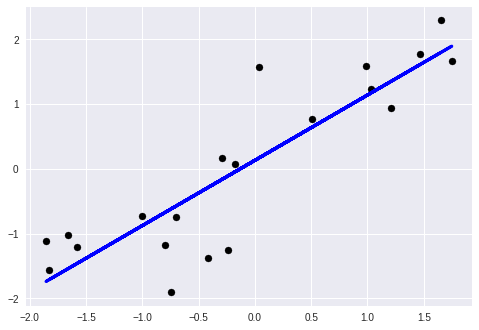

In [ ]:
plt.scatter(X, Y, color="black")
plt.plot(X, (np.dot(newW,X) + newB), color="blue", linewidth=3)
plt.show()

##Using Scikit Learn Library

This whole process can be done in a few lines of code using the SciKitLearn's machine learning library but I believe it's invaluable to be able to understand what's going on under the hood before relying on libraries.

It's important to be able to recognize when the results you get from these libraries might not align with what's expected from the data.

Below is the SciKitLearn method for fitting a line to our data.

Coefficients (w): 
 [1.00783587]
Intercept (b): 
 0.13192867257491708
Mean squared error: 0.40


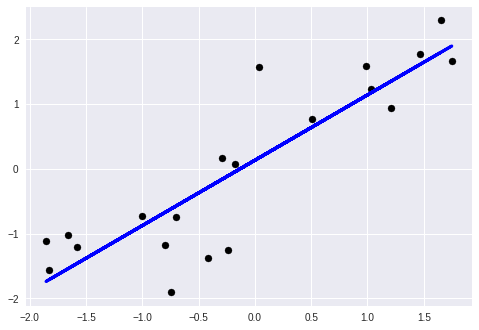

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Points must each be contained in their own list within a list of data points
skX = np.array([[x] for x in X])


regr = LinearRegression()
regr.fit(skX, Y)
y_pred = regr.predict(skX)

# The coefficients
print("Coefficients (w): \n", regr.coef_)
print("Intercept (b): \n", regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y, y_pred))

# Plot outputs
plt.scatter(skX, Y, color="black")
plt.plot(skX, y_pred, color="blue", linewidth=3)
plt.show()

As you can see, the results are almost the same using the two methods, but knowing both allows me to verify my results.

With more robust data in models intended for use, there would be two different sets of data for training and testing. The testing dataset would be unseen by the model during training and would be used to test the accuracy of y predictions using this line of best fit. This notebook, however, is a reference of my understanding of the internal workings of a Linear Regression model and gradient descent concepts.

#References used

https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/
https://medium.com/analytics-vidhya/linear-regression-with-gradient-descent-derivation-c10685ddf0f4
https://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/readings/L02%20Linear%20Regression.pdf

https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf


https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py